In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
import names
df = pd.read_csv("htru.csv", names = names.names)

In [3]:
# head of data (5)
df.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# df to values
df = df.values

In [5]:
# Deep ExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/htru.json")  
gc = GCForest(config)

In [6]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,8]
X = df[:,0:8]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# count class
len(np.unique(y_train))

2

In [8]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-30 18:20:13,834][cascade_classifier.fit_transform] X_groups_train.shape=[(12528, 8)],y_train.shape=(12528,),X_groups_test.shape=[(5370, 8)],y_test.shape=(5370,)
[ 2018-07-30 18:20:13,835][cascade_classifier.fit_transform] group_dims=[8]
[ 2018-07-30 18:20:13,836][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 18:20:13,837][cascade_classifier.fit_transform] group_ends=[8]
[ 2018-07-30 18:20:13,838][cascade_classifier.fit_transform] X_train.shape=(12528, 8),X_test.shape=(5370, 8)
[ 2018-07-30 18:20:13,840][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(12528, 8), X_cur_test.shape=(5370, 8)
[ 2018-07-30 18:20:14,493][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-30 18:20:15,336][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-30 18:20:16,060][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 18:20:21,747][cascade_classifier.transform] X_groups_test.shape=[(5370, 8)]
[ 2018-07-30 18:20:21,749][cascade_classifier.transform] group_dims=[8]
[ 2018-07-30 18:20:21,749][cascade_classifier.transform] X_test.shape=(5370, 8)
[ 2018-07-30 18:20:21,750][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(5370, 8)


Test Accuracy of CascadeExtraTrees = 98.063315 %
[[4898   28]
 [  76  368]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      4926
        1.0       0.93      0.83      0.88       444

avg / total       0.98      0.98      0.98      5370



In [10]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-30 18:20:24,024][cascade_classifier.transform] X_groups_test.shape=[(5370, 8)]
[ 2018-07-30 18:20:24,025][cascade_classifier.transform] group_dims=[8]
[ 2018-07-30 18:20:24,026][cascade_classifier.transform] X_test.shape=(5370, 8)
[ 2018-07-30 18:20:24,027][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(5370, 8)


In [11]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [12]:
X_test_new.shape

(5370, 10)

In [13]:
X_train_new.shape

(12528, 10)

In [14]:
# Cascade ExtraTrees
config = load_json("./examples/htrugc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-30 18:20:26,341][cascade_classifier.fit_transform] X_groups_train.shape=[(12528, 10)],y_train.shape=(12528,),X_groups_test.shape=[(5370, 10)],y_test.shape=(5370,)
[ 2018-07-30 18:20:26,343][cascade_classifier.fit_transform] group_dims=[10]
[ 2018-07-30 18:20:26,344][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 18:20:26,345][cascade_classifier.fit_transform] group_ends=[10]
[ 2018-07-30 18:20:26,345][cascade_classifier.fit_transform] X_train.shape=(12528, 10),X_test.shape=(5370, 10)
[ 2018-07-30 18:20:26,347][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(12528, 10), X_cur_test.shape=(5370, 10)
[ 2018-07-30 18:20:26,839][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-30 18:20:27,671][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.85%
[ 2018-07-30 18:20:28,382][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator

[ 2018-07-30 18:21:00,593][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-30 18:21:01,444][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=98.56%
[ 2018-07-30 18:21:02,271][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=98.08%
[ 2018-07-30 18:21:03,106][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=98.24%
[ 2018-07-30 18:21:03,837][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=97.60%
[ 2018-07-30 18:21:04,552][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-30 18:21:05,270][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.52%
[ 2018-07-30 18:21:06,102][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.16%


[ 2018-07-30 18:21:36,824][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_7.predict)=98.32%
[ 2018-07-30 18:21:37,652][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_8.predict)=97.84%
[ 2018-07-30 18:21:38,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_9.predict)=98.48%
[ 2018-07-30 18:21:38,601][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_cv.predict)=98.07%
[ 2018-07-30 18:21:38,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.test.predict)=98.01%
[ 2018-07-30 18:21:38,603][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=98.07%
[ 2018-07-30 18:21:38,604][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=98.01%
[ 2018-07-30 18:21:38,605][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(12528, 12), X_cur_test.shape=(5370, 12)
[ 201

In [15]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 18:22:04,117][cascade_classifier.transform] X_groups_test.shape=[(5370, 10)]
[ 2018-07-30 18:22:04,118][cascade_classifier.transform] group_dims=[10]
[ 2018-07-30 18:22:04,119][cascade_classifier.transform] X_test.shape=(5370, 10)
[ 2018-07-30 18:22:04,121][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(5370, 10)
[ 2018-07-30 18:22:06,381][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:22:08,650][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:22:10,923][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:22:13,188][cascade_classifier.transform] [layer=4] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:22:15,443][cascade_classifier.transform] [layer=5] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:22:17,697][cascade_classifier.transform] [layer=6] look_indexs=[0], 

Test Accuracy of CascadeExtraTrees = 98.007449 %
[[4888   38]
 [  69  375]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370



In [16]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/htrugc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")  

[ 2018-07-30 18:22:24,634][cascade_classifier.fit_transform] X_groups_train.shape=[(12528, 10)],y_train.shape=(12528,),X_groups_test.shape=[(5370, 10)],y_test.shape=(5370,)
[ 2018-07-30 18:22:24,635][cascade_classifier.fit_transform] group_dims=[10]
[ 2018-07-30 18:22:24,636][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 18:22:24,637][cascade_classifier.fit_transform] group_ends=[10]
[ 2018-07-30 18:22:24,638][cascade_classifier.fit_transform] X_train.shape=(12528, 10),X_test.shape=(5370, 10)
[ 2018-07-30 18:22:24,639][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(12528, 10), X_cur_test.shape=(5370, 10)
[ 2018-07-30 18:22:25,368][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-30 18:22:26,083][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.01%
[ 2018-07-30 18:22:26,919][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator

[ 2018-07-30 18:22:58,486][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=97.77%
[ 2018-07-30 18:22:59,638][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=98.25%
[ 2018-07-30 18:23:00,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=98.08%
[ 2018-07-30 18:23:01,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=98.56%
[ 2018-07-30 18:23:02,459][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=97.36%
[ 2018-07-30 18:23:03,421][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-30 18:23:04,379][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.68%
[ 2018-07-30 18:23:05,206][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.24%


('Test Accuracy of CascadeExtraTrees = 98.007449 %', 'Layer :', 0)
[[4893   33]
 [  74  370]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.83      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '41.669', ' seconds')


[ 2018-07-30 18:23:11,430][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.93%
[ 2018-07-30 18:23:12,269][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-30 18:23:12,988][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.04%
[ 2018-07-30 18:23:13,816][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-30 18:23:14,656][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.29%
[ 2018-07-30 18:23:15,376][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-30 18:23:16,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-30 18:23:17,033][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


[ 2018-07-30 18:23:47,758][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.44%
[ 2018-07-30 18:23:48,470][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.00%
[ 2018-07-30 18:23:49,300][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.16%
[ 2018-07-30 18:23:50,014][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.40%
[ 2018-07-30 18:23:50,241][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.01%
[ 2018-07-30 18:23:50,242][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.97%
[ 2018-07-30 18:23:50,243][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.01%
[ 2018-07-30 18:23:50,244][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.97%
[ 2018-07-30 18:23:50,246][

[ 2018-07-30 18:24:23,475][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=98.03%
[ 2018-07-30 18:24:23,476][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.95%
[ 2018-07-30 18:24:23,477][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=98.08%, accuracy_test=97.91%
[ 2018-07-30 18:24:23,489][cascade_classifier.transform] X_groups_test.shape=[(5370, 10)]
[ 2018-07-30 18:24:23,490][cascade_classifier.transform] group_dims=[10]
[ 2018-07-30 18:24:23,491][cascade_classifier.transform] X_test.shape=(5370, 10)
[ 2018-07-30 18:24:23,491][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(5370, 10)
[ 2018-07-30 18:24:25,736][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:24:27,983][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:24:30,245][cascade_class

('Test Accuracy of CascadeExtraTrees = 97.914339 %', 'Layer :', 1)
[[4887   39]
 [  73  371]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '72.689', ' seconds')


[ 2018-07-30 18:24:37,667][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-30 18:24:38,378][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.01%
[ 2018-07-30 18:24:39,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.80%
[ 2018-07-30 18:24:40,032][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-30 18:24:40,742][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.21%
[ 2018-07-30 18:24:41,606][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.32%
[ 2018-07-30 18:24:42,324][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-30 18:24:43,038][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.52%


[ 2018-07-30 18:25:15,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.44%
[ 2018-07-30 18:25:16,030][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.16%
[ 2018-07-30 18:25:16,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.08%
[ 2018-07-30 18:25:17,693][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.00%
[ 2018-07-30 18:25:17,922][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.93%
[ 2018-07-30 18:25:17,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.97%
[ 2018-07-30 18:25:17,924][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.93%
[ 2018-07-30 18:25:17,925][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.97%
[ 2018-07-30 18:25:17,926][

[ 2018-07-30 18:25:50,536][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=97.92%
[ 2018-07-30 18:25:50,537][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.97%
[ 2018-07-30 18:25:50,538][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(12528, 12), X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:25:51,029][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_0.predict)=97.77%
[ 2018-07-30 18:25:51,754][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_1.predict)=97.29%
[ 2018-07-30 18:25:52,586][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_2.predict)=97.53%
[ 2018-07-30 18:25:53,417][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_3.predict)=98.64%
[ 2018-07-30 18:25:54,141][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_4.predict)=98.32%
[ 2

('Test Accuracy of CascadeExtraTrees = 98.063315 %', 'Layer :', 2)
[[4893   33]
 [  71  373]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '81.901', ' seconds')


[ 2018-07-30 18:26:15,422][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.85%
[ 2018-07-30 18:26:16,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.61%
[ 2018-07-30 18:26:16,968][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.64%
[ 2018-07-30 18:26:17,795][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.69%
[ 2018-07-30 18:26:18,623][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=96.97%
[ 2018-07-30 18:26:19,446][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.32%
[ 2018-07-30 18:26:20,168][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-30 18:26:21,126][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.76%


[ 2018-07-30 18:26:51,260][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.44%
[ 2018-07-30 18:26:52,086][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.76%
[ 2018-07-30 18:26:52,915][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.92%
[ 2018-07-30 18:26:53,759][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.00%
[ 2018-07-30 18:26:53,988][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.88%
[ 2018-07-30 18:26:53,989][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.99%
[ 2018-07-30 18:26:53,990][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.88%
[ 2018-07-30 18:26:53,991][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.99%
[ 2018-07-30 18:26:53,992][

('Test Accuracy of CascadeExtraTrees = 97.914339 %', 'Layer :', 3)
[[4886   40]
 [  72  372]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '39.092', ' seconds')


[ 2018-07-30 18:26:59,360][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-30 18:27:00,333][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.77%
[ 2018-07-30 18:27:01,314][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.56%
[ 2018-07-30 18:27:02,290][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.45%
[ 2018-07-30 18:27:03,015][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.53%
[ 2018-07-30 18:27:03,846][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-30 18:27:04,654][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-30 18:27:05,479][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.60%


[ 2018-07-30 18:27:36,912][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.44%
[ 2018-07-30 18:27:37,636][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.84%
[ 2018-07-30 18:27:38,472][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.84%
[ 2018-07-30 18:27:39,185][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.16%
[ 2018-07-30 18:27:39,414][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.90%
[ 2018-07-30 18:27:39,415][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.04%
[ 2018-07-30 18:27:39,416][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.90%
[ 2018-07-30 18:27:39,417][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.04%
[ 2018-07-30 18:27:39,419][

[ 2018-07-30 18:28:11,673][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=97.90%
[ 2018-07-30 18:28:11,674][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.95%
[ 2018-07-30 18:28:11,676][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(12528, 12), X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:28:12,171][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_0.predict)=98.01%
[ 2018-07-30 18:28:12,888][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_1.predict)=97.29%
[ 2018-07-30 18:28:13,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_2.predict)=97.53%
[ 2018-07-30 18:28:14,657][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_3.predict)=98.48%
[ 2018-07-30 18:28:15,375][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_4.predict)=98.16%
[ 2

('Test Accuracy of CascadeExtraTrees = 97.988827 %', 'Layer :', 4)
[[4892   34]
 [  74  370]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.83      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '80.947', ' seconds')


[ 2018-07-30 18:28:36,147][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.01%
[ 2018-07-30 18:28:36,865][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.25%
[ 2018-07-30 18:28:37,701][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.80%
[ 2018-07-30 18:28:38,421][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.53%
[ 2018-07-30 18:28:39,130][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.45%
[ 2018-07-30 18:28:39,956][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.92%
[ 2018-07-30 18:28:40,820][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-30 18:28:41,649][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


[ 2018-07-30 18:29:13,283][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-30 18:29:14,118][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.92%
[ 2018-07-30 18:29:14,827][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.32%
[ 2018-07-30 18:29:15,656][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.32%
[ 2018-07-30 18:29:15,885][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.01%
[ 2018-07-30 18:29:15,886][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.95%
[ 2018-07-30 18:29:15,887][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.01%
[ 2018-07-30 18:29:15,888][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.95%
[ 2018-07-30 18:29:15,890][

[ 2018-07-30 18:29:47,000][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=98.03%
[ 2018-07-30 18:29:47,001][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.80%
[ 2018-07-30 18:29:47,002][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=98.15%, accuracy_test=97.95%
[ 2018-07-30 18:29:47,015][cascade_classifier.transform] X_groups_test.shape=[(5370, 10)]
[ 2018-07-30 18:29:47,016][cascade_classifier.transform] group_dims=[10]
[ 2018-07-30 18:29:47,017][cascade_classifier.transform] X_test.shape=(5370, 10)
[ 2018-07-30 18:29:47,017][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(5370, 10)
[ 2018-07-30 18:29:49,275][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:29:51,543][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:29:53,814][cascade_class

('Test Accuracy of CascadeExtraTrees = 97.951583 %', 'Layer :', 5)
[[4889   37]
 [  73  371]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '71.512', ' seconds')


[ 2018-07-30 18:30:01,517][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-30 18:30:02,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-30 18:30:03,255][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.80%
[ 2018-07-30 18:30:04,222][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.45%
[ 2018-07-30 18:30:04,934][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.37%
[ 2018-07-30 18:30:05,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.76%
[ 2018-07-30 18:30:06,365][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-30 18:30:07,215][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.68%


[ 2018-07-30 18:30:38,237][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.52%
[ 2018-07-30 18:30:38,950][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.60%
[ 2018-07-30 18:30:39,776][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.16%
[ 2018-07-30 18:30:40,613][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.40%
[ 2018-07-30 18:30:40,842][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.85%
[ 2018-07-30 18:30:40,843][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.95%
[ 2018-07-30 18:30:40,845][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.85%
[ 2018-07-30 18:30:40,846][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.95%
[ 2018-07-30 18:30:40,847][

('Test Accuracy of CascadeExtraTrees = 97.765363 %', 'Layer :', 6)
[[4888   38]
 [  82  362]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      4926
        1.0       0.91      0.82      0.86       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '40.11', ' seconds')


[ 2018-07-30 18:30:45,872][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.17%
[ 2018-07-30 18:30:46,584][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.01%
[ 2018-07-30 18:30:47,298][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.96%
[ 2018-07-30 18:30:48,023][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.69%
[ 2018-07-30 18:30:48,852][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.21%
[ 2018-07-30 18:30:49,562][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.00%
[ 2018-07-30 18:30:50,394][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-30 18:30:51,224][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.60%


[ 2018-07-30 18:31:24,312][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-30 18:31:25,334][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.84%
[ 2018-07-30 18:31:26,169][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.32%
[ 2018-07-30 18:31:26,995][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.56%
[ 2018-07-30 18:31:27,224][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.06%
[ 2018-07-30 18:31:27,225][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.93%
[ 2018-07-30 18:31:27,226][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.06%
[ 2018-07-30 18:31:27,227][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.93%
[ 2018-07-30 18:31:27,229][

('Test Accuracy of CascadeExtraTrees = 97.932961 %', 'Layer :', 7)
[[4887   39]
 [  72  372]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '65.491', ' seconds')


[ 2018-07-30 18:32:02,966][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.17%
[ 2018-07-30 18:32:03,792][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-30 18:32:04,619][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.96%
[ 2018-07-30 18:32:05,348][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-30 18:32:06,179][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.45%
[ 2018-07-30 18:32:07,010][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.00%
[ 2018-07-30 18:32:07,826][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-30 18:32:08,650][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.52%


[ 2018-07-30 18:32:39,557][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-30 18:32:40,395][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.44%
[ 2018-07-30 18:32:41,107][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.40%
[ 2018-07-30 18:32:41,820][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.48%
[ 2018-07-30 18:32:42,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.98%
[ 2018-07-30 18:32:42,047][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.99%
[ 2018-07-30 18:32:42,048][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.98%
[ 2018-07-30 18:32:42,049][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.99%
[ 2018-07-30 18:32:42,049][

('Test Accuracy of CascadeExtraTrees = 98.007449 %', 'Layer :', 8)
[[4892   34]
 [  73  371]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '39.714', ' seconds')


[ 2018-07-30 18:32:47,227][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.01%
[ 2018-07-30 18:32:47,940][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.48%
[ 2018-07-30 18:32:48,656][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.20%
[ 2018-07-30 18:32:49,483][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.85%
[ 2018-07-30 18:32:50,197][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.05%
[ 2018-07-30 18:32:50,928][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.00%
[ 2018-07-30 18:32:51,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-30 18:32:52,486][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


[ 2018-07-30 18:33:25,112][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-30 18:33:25,940][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.92%
[ 2018-07-30 18:33:26,767][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.32%
[ 2018-07-30 18:33:27,582][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.64%
[ 2018-07-30 18:33:27,809][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.08%
[ 2018-07-30 18:33:27,810][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.95%
[ 2018-07-30 18:33:27,811][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.08%
[ 2018-07-30 18:33:27,812][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.95%
[ 2018-07-30 18:33:27,814][

('Test Accuracy of CascadeExtraTrees = 98.007449 %', 'Layer :', 9)
[[4893   33]
 [  74  370]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.92      0.83      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '56.804', ' seconds')


[ 2018-07-30 18:33:53,072][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.09%
[ 2018-07-30 18:33:53,801][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.41%
[ 2018-07-30 18:33:54,627][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.88%
[ 2018-07-30 18:33:55,357][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.92%
[ 2018-07-30 18:33:56,102][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.53%
[ 2018-07-30 18:33:57,063][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.92%
[ 2018-07-30 18:33:57,903][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-30 18:33:59,011][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.68%


[ 2018-07-30 18:34:32,088][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-30 18:34:32,803][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.84%
[ 2018-07-30 18:34:33,631][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.92%
[ 2018-07-30 18:34:34,346][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.32%
[ 2018-07-30 18:34:34,573][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.00%
[ 2018-07-30 18:34:34,575][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.10%
[ 2018-07-30 18:34:34,577][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.00%
[ 2018-07-30 18:34:34,578][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.10%
[ 2018-07-30 18:34:34,579][

[ 2018-07-30 18:35:06,964][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=98.00%
[ 2018-07-30 18:35:06,965][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=98.01%
[ 2018-07-30 18:35:06,966][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(12528, 12), X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:35:07,578][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_0.predict)=98.33%
[ 2018-07-30 18:35:08,412][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_1.predict)=97.45%
[ 2018-07-30 18:35:09,257][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_2.predict)=97.61%
[ 2018-07-30 18:35:10,082][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_3.predict)=98.16%
[ 2018-07-30 18:35:10,916][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_4.predict)=98.64%
[ 2

('Test Accuracy of CascadeExtraTrees = 98.026071 %', 'Layer :', 10)
[[4891   35]
 [  71  373]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.84      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '82.531', ' seconds')


[ 2018-07-30 18:35:31,397][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.17%
[ 2018-07-30 18:35:32,235][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-30 18:35:32,952][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.04%
[ 2018-07-30 18:35:33,670][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.69%
[ 2018-07-30 18:35:34,510][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.53%
[ 2018-07-30 18:35:35,227][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.08%
[ 2018-07-30 18:35:36,053][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.52%
[ 2018-07-30 18:35:36,876][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


[ 2018-07-30 18:36:08,222][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.20%
[ 2018-07-30 18:36:09,054][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.84%
[ 2018-07-30 18:36:09,854][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.32%
[ 2018-07-30 18:36:10,683][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.16%
[ 2018-07-30 18:36:10,909][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.92%
[ 2018-07-30 18:36:10,910][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.95%
[ 2018-07-30 18:36:10,911][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.92%
[ 2018-07-30 18:36:10,912][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.95%
[ 2018-07-30 18:36:10,914][

('Test Accuracy of CascadeExtraTrees = 97.914339 %', 'Layer :', 11)
[[4886   40]
 [  72  372]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.84      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '56.259', ' seconds')


[ 2018-07-30 18:36:36,785][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.17%
[ 2018-07-30 18:36:37,626][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-30 18:36:38,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.80%
[ 2018-07-30 18:36:39,179][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-30 18:36:39,892][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.21%
[ 2018-07-30 18:36:40,721][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.92%
[ 2018-07-30 18:36:41,560][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.44%
[ 2018-07-30 18:36:42,399][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.76%


[ 2018-07-30 18:37:14,170][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.36%
[ 2018-07-30 18:37:14,885][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.84%
[ 2018-07-30 18:37:15,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.32%
[ 2018-07-30 18:37:16,436][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.24%
[ 2018-07-30 18:37:16,664][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.99%
[ 2018-07-30 18:37:16,665][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.01%
[ 2018-07-30 18:37:16,666][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.99%
[ 2018-07-30 18:37:16,667][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.01%
[ 2018-07-30 18:37:16,669][

[ 2018-07-30 18:37:49,050][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=97.90%
[ 2018-07-30 18:37:49,051][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=98.04%
[ 2018-07-30 18:37:49,053][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(12528, 12), X_cur_test.shape=(5370, 12)
[ 2018-07-30 18:37:49,550][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_0.predict)=98.25%
[ 2018-07-30 18:37:50,265][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_1.predict)=97.61%
[ 2018-07-30 18:37:50,980][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_2.predict)=97.21%
[ 2018-07-30 18:37:51,853][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_3.predict)=98.00%
[ 2018-07-30 18:37:52,684][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_4.predict)=98.64%
[ 2

('Test Accuracy of CascadeExtraTrees = 97.951583 %', 'Layer :', 12)
[[4883   43]
 [  67  377]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '90.073', ' seconds')


[ 2018-07-30 18:38:24,857][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.41%
[ 2018-07-30 18:38:25,715][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-30 18:38:26,424][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.80%
[ 2018-07-30 18:38:27,134][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.37%
[ 2018-07-30 18:38:27,856][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.37%
[ 2018-07-30 18:38:28,681][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.00%
[ 2018-07-30 18:38:29,515][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-30 18:38:30,344][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.76%


[ 2018-07-30 18:39:01,038][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.52%
[ 2018-07-30 18:39:01,995][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.68%
[ 2018-07-30 18:39:02,976][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.32%
[ 2018-07-30 18:39:03,971][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.24%
[ 2018-07-30 18:39:04,201][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.93%
[ 2018-07-30 18:39:04,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.14%
[ 2018-07-30 18:39:04,203][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.93%
[ 2018-07-30 18:39:04,204][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.14%
[ 2018-07-30 18:39:04,205][

('Test Accuracy of CascadeExtraTrees = 98.156425 %', 'Layer :', 13)
[[4888   38]
 [  61  383]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.91      0.86      0.89       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '39.879', ' seconds')


[ 2018-07-30 18:39:09,254][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.48%
[ 2018-07-30 18:39:09,977][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.48%
[ 2018-07-30 18:39:10,930][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.64%
[ 2018-07-30 18:39:11,755][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.53%
[ 2018-07-30 18:39:12,469][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.05%
[ 2018-07-30 18:39:13,195][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.84%
[ 2018-07-30 18:39:13,911][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.76%
[ 2018-07-30 18:39:14,637][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.68%


[ 2018-07-30 18:39:44,917][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.52%
[ 2018-07-30 18:39:45,747][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.08%
[ 2018-07-30 18:39:46,581][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.40%
[ 2018-07-30 18:39:47,411][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.24%
[ 2018-07-30 18:39:47,638][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.04%
[ 2018-07-30 18:39:47,639][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.03%
[ 2018-07-30 18:39:47,640][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.04%
[ 2018-07-30 18:39:47,642][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.03%
[ 2018-07-30 18:39:47,643][

('Test Accuracy of CascadeExtraTrees = 98.044693 %', 'Layer :', 14)
[[4886   40]
 [  65  379]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '64.214', ' seconds')


[ 2018-07-30 18:40:25,122][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.33%
[ 2018-07-30 18:40:25,838][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-30 18:40:26,552][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.56%
[ 2018-07-30 18:40:27,384][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-30 18:40:28,095][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.45%
[ 2018-07-30 18:40:28,808][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.32%
[ 2018-07-30 18:40:29,523][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.52%
[ 2018-07-30 18:40:30,349][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.84%


[ 2018-07-30 18:41:01,890][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-30 18:41:02,872][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.92%
[ 2018-07-30 18:41:03,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.08%
[ 2018-07-30 18:41:04,812][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.32%
[ 2018-07-30 18:41:05,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.08%
[ 2018-07-30 18:41:05,047][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.97%
[ 2018-07-30 18:41:05,048][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.08%
[ 2018-07-30 18:41:05,049][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.97%
[ 2018-07-30 18:41:05,050][

('Test Accuracy of CascadeExtraTrees = 97.970205 %', 'Layer :', 15)
[[4881   45]
 [  64  380]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.89      0.86      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '64.456', ' seconds')


[ 2018-07-30 18:41:40,703][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.25%
[ 2018-07-30 18:41:41,544][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.25%
[ 2018-07-30 18:41:42,271][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.48%
[ 2018-07-30 18:41:42,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.53%
[ 2018-07-30 18:41:43,725][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.29%
[ 2018-07-30 18:41:44,438][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.32%
[ 2018-07-30 18:41:45,159][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.52%
[ 2018-07-30 18:41:45,882][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.60%


[ 2018-07-30 18:42:18,492][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.36%
[ 2018-07-30 18:42:19,324][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.68%
[ 2018-07-30 18:42:20,155][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.16%
[ 2018-07-30 18:42:21,112][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.40%
[ 2018-07-30 18:42:21,344][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.99%
[ 2018-07-30 18:42:21,345][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.95%
[ 2018-07-30 18:42:21,346][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.99%
[ 2018-07-30 18:42:21,347][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.95%
[ 2018-07-30 18:42:21,348][

('Test Accuracy of CascadeExtraTrees = 97.951583 %', 'Layer :', 16)
[[4882   44]
 [  66  378]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '41.277', ' seconds')


[ 2018-07-30 18:42:26,397][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.33%
[ 2018-07-30 18:42:27,231][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-30 18:42:28,074][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.64%
[ 2018-07-30 18:42:28,902][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.45%
[ 2018-07-30 18:42:29,616][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.37%
[ 2018-07-30 18:42:30,348][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.16%
[ 2018-07-30 18:42:31,174][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.36%
[ 2018-07-30 18:42:31,886][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.92%


[ 2018-07-30 18:43:04,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.20%
[ 2018-07-30 18:43:05,006][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.08%
[ 2018-07-30 18:43:05,728][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.84%
[ 2018-07-30 18:43:06,441][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.16%
[ 2018-07-30 18:43:06,669][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.91%
[ 2018-07-30 18:43:06,670][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.95%
[ 2018-07-30 18:43:06,672][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.91%
[ 2018-07-30 18:43:06,672][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.95%
[ 2018-07-30 18:43:06,673][

('Test Accuracy of CascadeExtraTrees = 97.988827 %', 'Layer :', 17)
[[4883   43]
 [  65  379]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '40.792', ' seconds')


[ 2018-07-30 18:43:11,729][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.41%
[ 2018-07-30 18:43:12,594][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.09%
[ 2018-07-30 18:43:13,436][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.72%
[ 2018-07-30 18:43:14,163][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.77%
[ 2018-07-30 18:43:14,878][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.13%
[ 2018-07-30 18:43:15,707][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.00%
[ 2018-07-30 18:43:16,422][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-30 18:43:17,264][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.00%


[ 2018-07-30 18:43:49,524][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.44%
[ 2018-07-30 18:43:50,365][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.92%
[ 2018-07-30 18:43:51,194][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.92%
[ 2018-07-30 18:43:52,014][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.16%
[ 2018-07-30 18:43:52,244][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.77%
[ 2018-07-30 18:43:52,245][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.01%
[ 2018-07-30 18:43:52,246][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.77%
[ 2018-07-30 18:43:52,247][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.01%
[ 2018-07-30 18:43:52,248][

('Test Accuracy of CascadeExtraTrees = 97.988827 %', 'Layer :', 18)
[[4885   41]
 [  67  377]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.87       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '57.969', ' seconds')


[ 2018-07-30 18:44:18,770][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.41%
[ 2018-07-30 18:44:19,488][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.69%
[ 2018-07-30 18:44:20,316][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.64%
[ 2018-07-30 18:44:21,033][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.29%
[ 2018-07-30 18:44:21,758][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.53%
[ 2018-07-30 18:44:22,500][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.92%
[ 2018-07-30 18:44:23,225][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.68%
[ 2018-07-30 18:44:24,050][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.92%


('Test Accuracy of CascadeExtraTrees = 98.044693 %', 'Layer :', 19)
[[4886   40]
 [  65  379]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4926
        1.0       0.90      0.85      0.88       444

avg / total       0.98      0.98      0.98      5370

(' Time ', '31.876', ' seconds')


('Opt_Cascade_num =', 13, ' Accuracy =', 98.16, 'Time =', 858.65999999999997)


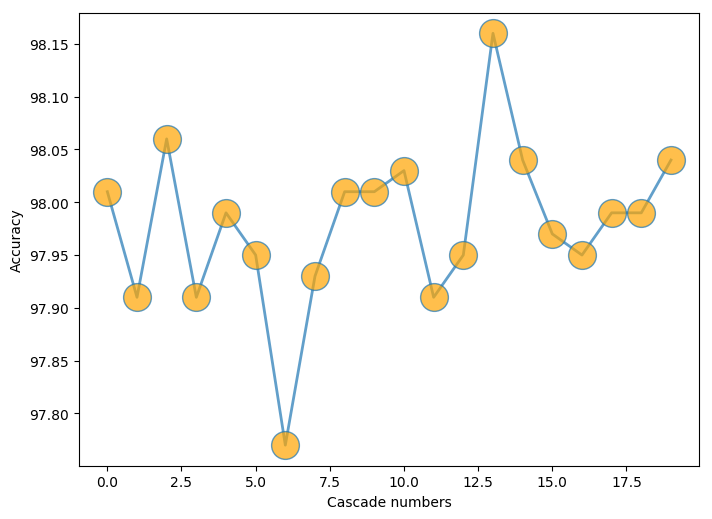

In [17]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [18]:
Accuracy

[98.01,
 97.91,
 98.06,
 97.91,
 97.99,
 97.95,
 97.77,
 97.93,
 98.01,
 98.01,
 98.03,
 97.91,
 97.95,
 98.16,
 98.04,
 97.97,
 97.95,
 97.99,
 97.99,
 98.04]